<a href="https://colab.research.google.com/github/harishmuh/machine_learning_practices/blob/main/Algorithmic_chain_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# **Algorithmic Chain**
---




Hello, Data enthusiast!

In this exercise, we will learn about algorithmic chain in machine learning.

In this case, imagine You work as a data scientist at an insurance company. You are tasked with predicting whether a prospective customer will file a claim or not after they purchase insurance from your company.

* Dataset: Car_Insurance_Claim.csv
* Target: 'OUTCOME'

    * 0: does not file a claim

    * 1: files a claim

1. Define FP (False Positive) and FN (False Negative) in this car insurance case. In your opinion, which type of error carries a higher cost (FP or FN)? Use an evaluation metric that matches the business needs!

2. Perform data cleaning if necessary!

3. Conduct a brief Exploratory Data Analysis (EDA) to understand the dataset you are working with!

4. Perform data splitting!

5. Carry out preprocessing/feature engineering as needed!

6. Perform cross-validation using several machine learning algorithms that you are familiar with. Choose the best algorithm for the final modeling!

7. Perform hyperparameter tuning on the selected model (from cross-validation). Choose the best hyperparameters for the final modeling!

8. Compare the model’s performance before and after hyperparameter tuning — does the performance improve?

* Model before hyperparameter tuning

* Model after hyperparameter tuning


**Define False Positive Vs False Negative ?**

**False positive (FP)**

*  A false positive (FP) indicates a model incorrectly predicted a positive outcome when the actual outcome was negative (Type I error).

**FP cost**:
* The consequence of false positive in our case study: We predict that the prospective customer will file a claim, which would lead the company to expect to pay out money, but in reality, they would not have filed a claim.

* Because we predict the prospective customer will file a claim, we charge them a high insurance premium.

* As a result, there is a high chance that the prospective customer decides not to use our insurance, and we lose a customer who would have actually been profitable for us.

**False Negative (FN)**
* A false negative (FN) indicates a model incorrectly predicted a negative outcome when the actual outcome was positive (Type II error)

**FN cost**:

* We predict that the prospective customer will not file a claim, meaning the company expects not to pay out money, but in reality, they do file a claim.

* Because we predict the prospective customer will not file a claim, we offer them a low premium, and they are more likely to become a customer.

* As a consequence, we later incur unexpected costs to pay for their claim.

By considering both FP and FN costs, we formulate our project objective as below


**Objective**

* Goal: Predict whether customers will claim their insurance or not.

* Priority: Both recall and precision are important. However we want to maximize recall (reduce false negatives) while keeping precision reasonable, as consequences of false negatives will be higher than false positive.

* Chosen Metric: F2 score — because it weights recall higher than precision.


In [1]:
# Installing library
!pip install category_encoders # Not available in colab

In [2]:
# Importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# train test split
from sklearn.model_selection import train_test_split

# Combining preprocessing steps
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline

# encoder dan scaler
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder, OrdinalEncoder
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer

# resampler
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTE

# ML algorithms for experiment
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

# cross validation to find the best algorithm
from sklearn.model_selection import cross_val_score, StratifiedKFold

# metrics
from sklearn.metrics import f1_score, classification_report, confusion_matrix, precision_recall_curve
from sklearn.metrics import make_scorer, fbeta_score

# hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

## **1. Loading Dataset**

In [3]:
# Loading dataset
url = 'https://raw.githubusercontent.com/harishmuh/machine_learning_practices/refs/heads/main/datasets/Car_Insurance_Claim.csv'
df = pd.read_csv(url)
df.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [4]:
# Data summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

In [5]:
# Statistical descriptive
df.describe()

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,10000.000000,9018.000000,10000.000000,10000.000000,10000.000000,10000.000000,9043.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,500521.906800,0.515813,0.697000,0.498200,0.688800,19864.548400,11697.003207,1.482900,0.23920,1.056300,0.313300
std,290030.768758,0.137688,0.459578,0.500022,0.463008,18915.613855,2818.434528,2.241966,0.55499,1.652454,0.463858
min,101.000000,0.053358,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.00000,0.000000,0.000000
25%,249638.500000,0.417191,0.000000,0.000000,0.000000,10238.000000,10000.000000,0.000000,0.00000,0.000000,0.000000
50%,501777.000000,0.525033,1.000000,0.000000,1.000000,10238.000000,12000.000000,0.000000,0.00000,0.000000,0.000000
75%,753974.500000,0.618312,1.000000,1.000000,1.000000,32765.000000,14000.000000,2.000000,0.00000,2.000000,1.000000
max,999976.000000,0.960819,1.000000,1.000000,1.000000,92101.000000,22000.000000,22.000000,6.00000,15.000000,1.000000


In [6]:
# Unique values
df['POSTAL_CODE'].value_counts()
# Need encoding

,count
POSTAL_CODE,
10238,6940
32765,2456
92101,484
21217,120


In [7]:
# Statistical descriptive of categorical features
df.describe(include='object')

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,VEHICLE_YEAR,VEHICLE_TYPE
count,10000,10000,10000,10000,10000,10000,10000,10000
unique,4,2,2,4,3,4,2,2
top,26-39,female,majority,0-9y,high school,upper class,before 2015,sedan
freq,3063,5010,9012,3530,4157,4336,6967,9523


## **2. Exploratory Data Analysis (EDA)**

In [8]:
# unique values in categorical columns

for i in df.describe(include='object').columns:
    print(i, '\n', df[i].unique(), '\n')

AGE 
 ['65+' '16-25' '26-39' '40-64'] 

GENDER 
 ['female' 'male'] 

RACE 
 ['majority' 'minority'] 

DRIVING_EXPERIENCE 
 ['0-9y' '10-19y' '20-29y' '30y+'] 

EDUCATION 
 ['high school' 'none' 'university'] 

INCOME 
 ['upper class' 'poverty' 'working class' 'middle class'] 

VEHICLE_YEAR 
 ['after 2015' 'before 2015'] 

VEHICLE_TYPE 
 ['sedan' 'sports car'] 



In [9]:
# Missing values
df.isna().sum().to_frame('missing_values')

,missing_values
ID,0
AGE,0
GENDER,0
RACE,0
DRIVING_EXPERIENCE,0
EDUCATION,0
INCOME,0
CREDIT_SCORE,982
VEHICLE_OWNERSHIP,0
VEHICLE_YEAR,0


In [10]:
# Correlation
df_numeric = df.select_dtypes(include='number')
df_numeric.corr()


,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
ID,1.000000,0.001704,0.009197,0.014826,0.001233,0.006038,-0.002217,0.008156,0.009268,0.001831,-0.010506
CREDIT_SCORE,0.001704,1.000000,0.312037,0.281238,0.220658,0.009040,-0.174453,0.204542,0.127366,0.180978,-0.325286
VEHICLE_OWNERSHIP,0.009197,0.312037,1.000000,0.175626,0.125990,-0.004866,-0.097433,0.133868,0.086567,0.119521,-0.378921
MARRIED,0.014826,0.281238,0.175626,1.000000,0.287009,0.012045,-0.462193,0.218855,0.120840,0.215269,-0.262104
CHILDREN,0.001233,0.220658,0.125990,0.287009,1.000000,0.020911,-0.447655,0.220415,0.115354,0.206295,-0.232835
POSTAL_CODE,0.006038,0.009040,-0.004866,0.012045,0.020911,1.000000,-0.133978,0.113686,0.038492,-0.116985,0.095889
ANNUAL_MILEAGE,-0.002217,-0.174453,-0.097433,-0.462193,-0.447655,-0.133978,1.000000,-0.323547,-0.116598,-0.195217,0.187154
SPEEDING_VIOLATIONS,0.008156,0.204542,0.133868,0.218855,0.220415,0.113686,-0.323547,1.000000,0.359838,0.443074,-0.291862
DUIS,0.009268,0.127366,0.086567,0.120840,0.115354,0.038492,-0.116598,0.359838,1.000000,0.259359,-0.189352
PAST_ACCIDENTS,0.001831,0.180978,0.119521,0.215269,0.206295,-0.116985,-0.195217,0.443074,0.259359,1.000000,-0.311495


In [11]:
# Missing value relationship
#plt.figure(figsize = (20,20))
#sns.heatmap(df.sort_values('MARRIED')[['CREDIT_SCORE','ANNUAL_MILEAGE']].isna())

In [12]:
# Comparison of Unique value
df['MARRIED'].value_counts()
# This feature has relatively balanced data

,count
MARRIED,
0.0,5018
1.0,4982


In [13]:
df['MARRIED'].sort_values()

,MARRIED
9985,0.0
9984,0.0
13,0.0
9,0.0
7,0.0
...,...
24,1.0
22,1.0
21,1.0
17,1.0


In [14]:
# Checking median for simple imputer (we will use it later)
df[df['MARRIED']==1]['ANNUAL_MILEAGE'].median()

10000.0

In [15]:
# Median ANNUAL_MILEAGE
df['ANNUAL_MILEAGE'].median()

12000.0

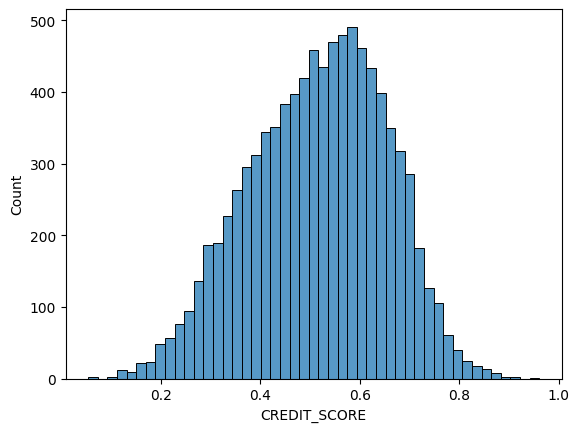

In [16]:
# Data distribution
# Histogram of credit score
sns.histplot(data=df, x='CREDIT_SCORE')
plt.show()

In [17]:
# Mean and median check
print(df['CREDIT_SCORE'].mean())
print(df['CREDIT_SCORE'].median())

0.515812809602791
0.5250327586154788


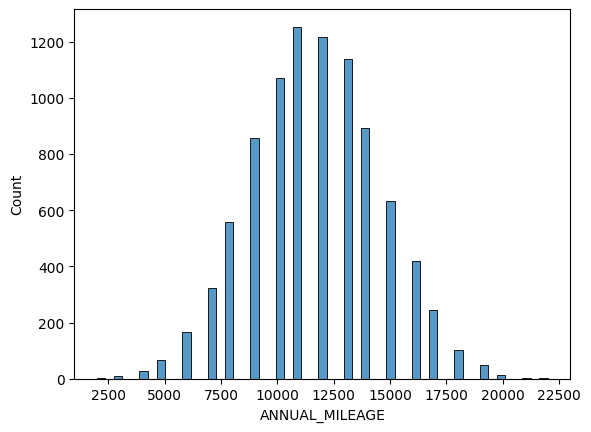

In [18]:
# Histogram of Annual milleage
sns.histplot(data=df, x='ANNUAL_MILEAGE')
plt.show()

In [19]:
# Mean, median, mode of Annual mileage
print(df['ANNUAL_MILEAGE'].mean())
print(df['ANNUAL_MILEAGE'].median())
print(df['ANNUAL_MILEAGE'].mode()[0])

11697.003206900365
12000.0
11000.0


In [20]:
# Imbalanced data check
# Outcome

df['OUTCOME'].value_counts()

# The target has relatively mild imbalance between majority and minority class

,count
OUTCOME,
0.0,6867
1.0,3133


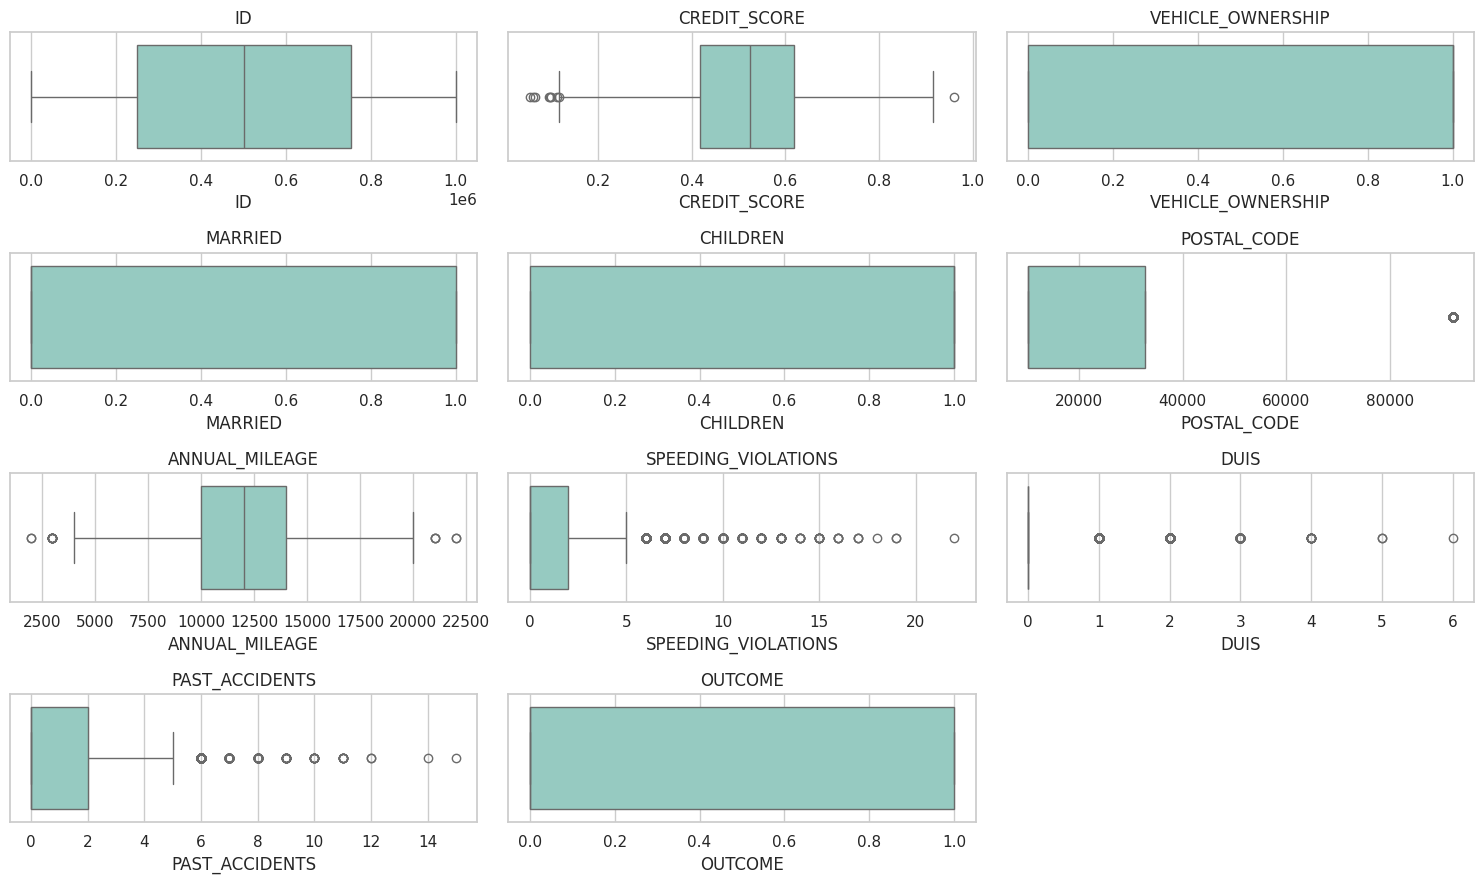

In [21]:
# Numerical Features
num_feature = [fea for fea in df.describe().columns]
num_feature

plt.figure(figsize=(15, 9), facecolor='white')
sns.set(style='whitegrid', palette='Set3')
plotnumber = 1

for feature in num_feature:
    ax = plt.subplot(4,3, plotnumber)
    sns.boxplot(x=feature, data=df);
    plt.title(feature, fontsize=12)
    plt.tight_layout()
    plotnumber += 1

In [22]:
# Duplicated data
df.duplicated().sum()

np.int64(0)

In [23]:
# N unique
df['POSTAL_CODE'].nunique()

4

## **3. Define features (X) and target (y)**

In [24]:
# Define X and y
X = df.drop(columns=['OUTCOME','ID'])
y = df['OUTCOME']

## **4. Data Splitting**

In [25]:
# Split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=0,
    stratify=y
)

## **5. Preprocessing**

**Imputation**
- Median:
    - 'CREDIT_SCORE'
    - 'ANNUAL_MILEAGE'

**Encoding**:
- Ordinal Encoder:
    - 'AGE'
    - 'DRIVING_EXPERIENCE'
    - 'EDUCATION'
    - 'INCOME'
- One Hot Encoder:
    - 'GENDER'
    - 'RACE'
    - 'VEHICLE_YEAR'
    - 'VEHICLE_TYPE'

**Scaling**:
- MinMax scaler
- Standard scaler
- Robust scaler

In [26]:
# Statistical descriptive # categorical features
df.describe(include='object')

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,VEHICLE_YEAR,VEHICLE_TYPE
count,10000,10000,10000,10000,10000,10000,10000,10000
unique,4,2,2,4,3,4,2,2
top,26-39,female,majority,0-9y,high school,upper class,before 2015,sedan
freq,3063,5010,9012,3530,4157,4336,6967,9523


In [27]:
# Comparison of unique value
df['AGE'].value_counts()

,count
AGE,
26-39,3063
40-64,2931
16-25,2016
65+,1990


In [28]:
X.columns

Index(['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
       'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR', 'MARRIED',
       'CHILDREN', 'POSTAL_CODE', 'ANNUAL_MILEAGE', 'VEHICLE_TYPE',
       'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS'],
      dtype='object')

In [29]:
# ordinal mapping 1
ordinal_mapping1 = [
    {'col':'AGE', 'mapping':{'16-25':20, '26-39':33, '40-64':47, '65+':70, None:0}},
    {'col':'DRIVING_EXPERIENCE', 'mapping':{'0-9y':5, '10-19y':15, '20-29y':25 , '30y+':35, None:0}},
    {'col':'EDUCATION', 'mapping':{'high school':12, 'university':16, 'none':0, None:0}},
    {'col':'INCOME', 'mapping':{'poverty':1, 'working class':2, 'middle class':3, 'upper class':4, None:0}}
]

# ordinal mapping 2
ordinal_mapping2 = [
    {'col':'AGE', 'mapping':{'16-25':1, '26-39':2, '40-64':3, '65+':4, None:0}},
    {'col':'DRIVING_EXPERIENCE', 'mapping':{'0-9y':1, '10-19y':2, '20-29y':3 , '30y+':4, None:0}},
    {'col':'EDUCATION', 'mapping':{'high school':1, 'university':2, 'none':0, None:0}},
    {'col':'INCOME', 'mapping':{'poverty':1, 'working class':2, 'middle class':3, 'upper class':4, None:0}}
]

In [30]:
# Transformer

pipe_median_scale = Pipeline([
    ('imp_median', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())
])

pipe_ordinal_scale = Pipeline([
    ('ordinal', OrdinalEncoder(cols=['AGE','DRIVING_EXPERIENCE','EDUCATION','INCOME'], mapping=ordinal_mapping1)),
    ('scaler', RobustScaler())
])

transformer = ColumnTransformer([
    ('pipe_median_scale', pipe_median_scale, ['CREDIT_SCORE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS']),
    ('pipe_ordinal_scale', pipe_ordinal_scale, ['AGE','DRIVING_EXPERIENCE','EDUCATION','INCOME']),
    ('onehot', OneHotEncoder(drop='first'), ['GENDER', 'RACE', 'VEHICLE_YEAR','VEHICLE_TYPE', 'POSTAL_CODE']),
], remainder='passthrough')

# 'MARRIED', 'CHILDREN', 'VEHICLE_OWNERSHIP' will go to the remainder='passthrough'

In [31]:
# Define scaler
minmax = MinMaxScaler()
standard = StandardScaler()
robust = RobustScaler()

## **6. Benchmark Model**

In [32]:
# Define models
logreg = LogisticRegression(solver='liblinear')
knn = KNeighborsClassifier(n_neighbors=5)
tree = DecisionTreeClassifier(max_depth=5, random_state=0, class_weight='balanced')

In [33]:
# Define resampler
ros = RandomOverSampler(random_state=0)
rus = RandomUnderSampler(random_state=0)
nearmiss = NearMiss()
smote = SMOTE(random_state=0)

In [34]:
from sklearn.metrics import make_scorer, fbeta_score

In [35]:
# Metrics
# We want to get both high recall and precision, but recall is more important for the case, to avoid more False negative
# f2 score (recall is more important than precision, but we still want both of them)
f2 = make_scorer(fbeta_score, beta=2)

# f0.5 score (precision is more important than recall, but we still want both of them)
f_setengah = make_scorer(fbeta_score, beta=0.5)

In [36]:
# Selected models
models = [logreg, knn, tree]

cv_mean = []
cv_std = []
cv_all = []



# Looking for the best model based on the highest f2 score and the lowest std
for i in models:

    skfold = StratifiedKFold(n_splits = 5)

    model_pipe = Pipeline([
        ('resampler', None),
        ('prep', transformer),
        ('model', i)])

    model_cv = cross_val_score(
        model_pipe,
        X_train,
        y_train,
        cv = skfold,
        scoring = f2,
        error_score='raise'
        )

    cv_mean.append(model_cv.mean())
    cv_std.append(model_cv.std())
    cv_all.append(model_cv.round(4))

In [37]:
df_cv = pd.DataFrame({
    'algo': models,
    'mean': cv_mean,
    'std': cv_std,
    'all': cv_all
})

df_cv

,algo,mean,std,all
0,LogisticRegression(solver='liblinear'),0.741289,0.019166,"[0.7352, 0.7298, 0.7449, 0.7762, 0.7204]"
1,KNeighborsClassifier(),0.660157,0.012822,"[0.6579, 0.6685, 0.645, 0.6801, 0.6492]"
2,DecisionTreeClassifier(class_weight='balanced'...,0.803611,0.013271,"[0.818, 0.7861, 0.793, 0.8195, 0.8015]"


We will select decision tree as it has the best score among models.

## **7. Hyperparameter Tuning**

In [38]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

### **a. Grid Search**

In [39]:
len(X_train)

8000

In [40]:
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipe_median_scale',
                                 Pipeline(steps=[('imp_median',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', RobustScaler())]),
                                 ['CREDIT_SCORE', 'ANNUAL_MILEAGE',
                                  'SPEEDING_VIOLATIONS', 'DUIS',
                                  'PAST_ACCIDENTS']),
                                ('pipe_ordinal_scale',
                                 Pipeline(steps=[('ordinal',
                                                  OrdinalEncoder(cols=['AGE',
                                                                       'DRIVING_EXPERIENCE',
                                                                       'ED...
                                                                           'mapping': high school    12
university     16
none            0
None            0
dtype: int64},
                                                                          {'col': 'INCOME',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': poverty          1
working class    2
middle class     3
upper class      4
None             0
dtype: int64}])),
                                                 ('scaler', RobustScaler())]),
                                 ['AGE', 'DRIVING_EXPERIENCE', 'EDUCATION',
                                  'INCOME']),
                                ('onehot', OneHotEncoder(drop='first'),
                                 ['GENDER', 'RACE', 'VEHICLE_YEAR',
                                  'VEHICLE_TYPE', 'POSTAL_CODE'])])

In [43]:
# hyperparameter for Decision Tree
hyperparam_space = {
    'algo__max_depth':[2,3,4,5,6,7],                                # 6
    'algo__min_samples_split':[2,5,10,15,20,50,100],                # 7
    'algo__min_samples_leaf':[2,5,10,15,20,50,100],                 # 7
    'prep__pipe_median_scale__scaler': [minmax, standard, robust],
    'prep__pipe_ordinal_scale__scaler': [minmax, standard, robust],
    'resampler':[None, rus, ros, nearmiss, smote],
    'algo__class_weight':[None, 'balanced']
}                                                                   # ... Model combination using different hyperparameters

# pipeline
pipe_model = Pipeline([
    ('resampler', None),
    ('prep', transformer),
    ('algo', tree)                  # selected benchmark model
])

# Define Grid Search
gridsearch = GridSearchCV(
    estimator=pipe_model,           # model
    param_grid=hyperparam_space,    # hyperparameter
    cv=5,                           # Cross-validation fold
    scoring=make_scorer(fbeta_score, beta=2), # metrics make_scorer to create a scorer for f2
    n_jobs=-1                       # Use all processor
)

In [44]:
# fitting
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('resampler', None),
                                       ('prep',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pipe_median_scale',
                                                                         Pipeline(steps=[('imp_median',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          RobustScaler())]),
                                                                         ['CREDIT_SCORE',
                                                                          'ANNUAL_MILEAGE',
                                                                          'SPEEDING_VIOLATIONS',
                                                                          'DUIS',
                                                                          'PAST_ACCIDENTS']),
                                                                        ('pipe_ordinal_scale',
                                                                         Pipelin...
                         'prep__pipe_median_scale__scaler': [MinMaxScaler(),
                                                             StandardScaler(),
                                                             RobustScaler()],
                         'prep__pipe_ordinal_scale__scaler': [MinMaxScaler(),
                                                              StandardScaler(),
                                                              RobustScaler()],
                         'resampler': [None, RandomUnderSampler(random_state=0),
                                       RandomOverSampler(random_state=0),
                                       NearMiss(), SMOTE(random_state=0)]},
             scoring=make_scorer(fbeta_score, response_method='predict', beta=2))

In [45]:
# Best score
gridsearch.best_score_

np.float64(0.8084076161360297)

In [46]:
# Best parameters
gridsearch.best_params_

{'algo__class_weight': None,
 'algo__max_depth': 7,
 'algo__min_samples_leaf': 5,
 'algo__min_samples_split': 50,
 'prep__pipe_median_scale__scaler': MinMaxScaler(),
 'prep__pipe_ordinal_scale__scaler': MinMaxScaler(),
 'resampler': RandomUnderSampler(random_state=0)}

In [47]:
# Best estimator (gridsearch)
gridsearch.best_estimator_

Pipeline(steps=[('resampler', RandomUnderSampler(random_state=0)),
                ('prep',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipe_median_scale',
                                                  Pipeline(steps=[('imp_median',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['CREDIT_SCORE',
                                                   'ANNUAL_MILEAGE',
                                                   'SPEEDING_VIOLATIONS',
                                                   'DUIS', 'PAST_ACCIDENTS']),
                                                 ('pipe_ordinal_scale',
                                                  Pipel...
                                                                                            'mapping': poverty          1
working class    2
middle class     3
upper class      4
None             0
dtype: int64}])),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['AGE', 'DRIVING_EXPERIENCE',
                                                   'EDUCATION', 'INCOME']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['GENDER', 'RACE',
                                                   'VEHICLE_YEAR',
                                                   'VEHICLE_TYPE',
                                                   'POSTAL_CODE'])])),
                ('algo',
                 DecisionTreeClassifier(max_depth=7, min_samples_leaf=5,
                                        min_samples_split=50,
                                        random_state=0))])

In [48]:
# Mean score on hyperparameter combination
cv_output = pd.DataFrame(gridsearch.cv_results_).sort_values('mean_test_score', ascending=False)
cv_output.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algo__class_weight,param_algo__max_depth,param_algo__min_samples_leaf,param_algo__min_samples_split,param_prep__pipe_median_scale__scaler,param_prep__pipe_ordinal_scale__scaler,param_resampler,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
11566,0.095499,0.004010,0.033486,0.003495,None,7,5,50,MinMaxScaler(),MinMaxScaler(),RandomUnderSampler(random_state=0),"{'algo__class_weight': None, 'algo__max_depth'...",0.809873,0.787684,0.794765,0.834581,0.815136,0.808408,0.01642,1
11576,0.102805,0.010003,0.031614,0.000608,None,7,5,50,MinMaxScaler(),RobustScaler(),RandomUnderSampler(random_state=0),"{'algo__class_weight': None, 'algo__max_depth'...",0.809873,0.787684,0.794765,0.834581,0.815136,0.808408,0.01642,1
11571,0.095551,0.004118,0.038433,0.012992,None,7,5,50,MinMaxScaler(),StandardScaler(),RandomUnderSampler(random_state=0),"{'algo__class_weight': None, 'algo__max_depth'...",0.809873,0.787684,0.794765,0.834581,0.815136,0.808408,0.01642,1
11606,0.102387,0.005161,0.033583,0.002356,None,7,5,50,RobustScaler(),RobustScaler(),RandomUnderSampler(random_state=0),"{'algo__class_weight': None, 'algo__max_depth'...",0.809873,0.787684,0.794765,0.834581,0.815136,0.808408,0.01642,1
11601,0.102908,0.005233,0.038260,0.010893,None,7,5,50,RobustScaler(),StandardScaler(),RandomUnderSampler(random_state=0),"{'algo__class_weight': None, 'algo__max_depth'...",0.809873,0.787684,0.794765,0.834581,0.815136,0.808408,0.01642,1


### **b. Randomized Search**

In [49]:
X.columns

Index(['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
       'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR', 'MARRIED',
       'CHILDREN', 'POSTAL_CODE', 'ANNUAL_MILEAGE', 'VEHICLE_TYPE',
       'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS'],
      dtype='object')

In [50]:
# hyperparameter for Decision Tree
hyperparam_space = {
    'algo__max_depth':range(2,20,1),            # 19
    'algo__min_samples_split':range(2,100,1),   # 99
    'algo__min_samples_leaf':range(1,100,1),    # 100
    'prep__pipe_median_scale__scaler': [minmax, standard, robust],
    'prep__pipe_ordinal_scale__scaler': [minmax, standard, robust],
    'prep__pipe_ordinal_scale__ordinal__mapping': [ordinal_mapping1, ordinal_mapping2],
    'resampler':[None, rus, ros, nearmiss, smote]
}

# pipeline
pipe_model = Pipeline([
    ('resampler', None),
    ('prep', transformer),
    ('algo', tree)          # The selected model
])

In [51]:
# Define Randomized Search
random_search = RandomizedSearchCV(
    estimator= pipe_model,
    param_distributions= hyperparam_space,
    cv=5,
    scoring=f2,
    n_jobs=-1,
    random_state=10,
    n_iter=1000                 # Number 0f (hypermeter) combinations
)

In [52]:
# fitting
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('resampler', None),
                                             ('prep',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('pipe_median_scale',
                                                                               Pipeline(steps=[('imp_median',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                RobustScaler())]),
                                                                               ['CREDIT_SCORE',
                                                                                'ANNUAL_MILEAGE',
                                                                                'SPEEDING_VIOLATIONS',
                                                                                'DUIS',
                                                                                'PAST_ACCIDENTS']),
                                                                              ('pipe_ordinal_scale',
                                                                               P...
                                                                                                     'middle class': 3,
                                                                                                     'poverty': 1,
                                                                                                     'upper class': 4,
                                                                                                     'working class': 2}}]],
                                        'prep__pipe_ordinal_scale__scaler': [MinMaxScaler(),
                                                                             StandardScaler(),
                                                                             RobustScaler()],
                                        'resampler': [None,
                                                      RandomUnderSampler(random_state=0),
                                                      RandomOverSampler(random_state=0),
                                                      NearMiss(),
                                                      SMOTE(random_state=0)]},
                   random_state=10,
                   scoring=make_scorer(fbeta_score, response_method='predict', beta=2))

In [53]:
# Best score
random_search.best_score_

np.float64(0.8090603635174549)

In [54]:
# Best parameters
random_search.best_params_

{'resampler': RandomUnderSampler(random_state=0),
 'prep__pipe_ordinal_scale__scaler': RobustScaler(),
 'prep__pipe_ordinal_scale__ordinal__mapping': [{'col': 'AGE',
   'mapping': 16-25    20
   26-39    33
   40-64    47
   65+      70
   None      0
   dtype: int64,
   'data_type': dtype('O')},
  {'col': 'DRIVING_EXPERIENCE',
   'mapping': 0-9y       5
   10-19y    15
   20-29y    25
   30y+      35
   None       0
   dtype: int64,
   'data_type': dtype('O')},
  {'col': 'EDUCATION',
   'mapping': high school    12
   university     16
   none            0
   None            0
   dtype: int64,
   'data_type': dtype('O')},
  {'col': 'INCOME',
   'mapping': poverty          1
   working class    2
   middle class     3
   upper class      4
   None             0
   dtype: int64,
   'data_type': dtype('O')}],
 'prep__pipe_median_scale__scaler': StandardScaler(),
 'algo__min_samples_split': 50,
 'algo__min_samples_leaf': 8,
 'algo__max_depth': 7}

In [55]:
# Best model (estimator)
random_search.best_estimator_

Pipeline(steps=[('resampler', RandomUnderSampler(random_state=0)),
                ('prep',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipe_median_scale',
                                                  Pipeline(steps=[('imp_median',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['CREDIT_SCORE',
                                                   'ANNUAL_MILEAGE',
                                                   'SPEEDING_VIOLATIONS',
                                                   'DUIS', 'PAST_ACCIDENTS']),
                                                 ('pipe_ordinal_scale',
                                                  Pip...
middle class     3
upper class      4
None             0
dtype: int64}])),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['AGE', 'DRIVING_EXPERIENCE',
                                                   'EDUCATION', 'INCOME']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['GENDER', 'RACE',
                                                   'VEHICLE_YEAR',
                                                   'VEHICLE_TYPE',
                                                   'POSTAL_CODE'])])),
                ('algo',
                 DecisionTreeClassifier(class_weight='balanced', max_depth=7,
                                        min_samples_leaf=8,
                                        min_samples_split=50,
                                        random_state=0))])

In [56]:
# Randomized
cv_output = pd.DataFrame(random_search.cv_results_).sort_values('mean_test_score', ascending=False)
cv_output.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_resampler,param_prep__pipe_ordinal_scale__scaler,param_prep__pipe_ordinal_scale__ordinal__mapping,param_prep__pipe_median_scale__scaler,param_algo__min_samples_split,param_algo__min_samples_leaf,param_algo__max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
543,0.102683,0.007358,0.032671,0.000648,RandomUnderSampler(random_state=0),RobustScaler(),"[{'col': 'AGE', 'mapping': [20, 33, 47, 70, 0]...",StandardScaler(),50,8,7,{'resampler': RandomUnderSampler(random_state=...,0.812789,0.788977,0.798861,0.828002,0.816673,0.809060,0.013697,1
108,0.108198,0.004690,0.032768,0.001719,RandomUnderSampler(random_state=0),RobustScaler(),"[{'col': 'AGE', 'mapping': {'16-25': 1, '26-39...",StandardScaler(),44,9,7,{'resampler': RandomUnderSampler(random_state=...,0.814843,0.787282,0.799320,0.826087,0.817055,0.808917,0.013830,2
458,0.102817,0.006250,0.033959,0.004453,RandomUnderSampler(random_state=0),RobustScaler(),"[{'col': 'AGE', 'mapping': {'16-25': 1, '26-39...",RobustScaler(),92,6,6,{'resampler': RandomUnderSampler(random_state=...,0.795143,0.788876,0.813433,0.823485,0.818419,0.807871,0.013482,3
469,0.100146,0.008438,0.034615,0.005232,RandomUnderSampler(random_state=0),StandardScaler(),"[{'col': 'AGE', 'mapping': [20, 33, 47, 70, 0]...",MinMaxScaler(),65,13,6,{'resampler': RandomUnderSampler(random_state=...,0.795455,0.785124,0.817878,0.822180,0.817236,0.807575,0.014586,4
64,0.102608,0.007079,0.036074,0.009765,RandomUnderSampler(random_state=0),RobustScaler(),"[{'col': 'AGE', 'mapping': {'16-25': 1, '26-39...",RobustScaler(),76,5,7,{'resampler': RandomUnderSampler(random_state=...,0.800000,0.781909,0.800989,0.837736,0.816673,0.807461,0.018718,5


Model performance on train set
- Benchmark model: 0.803
- Hyperparameter Tuning (GridSearchCV): 0.808
- Hyperparameter Tuning (RandomizedSearchCV): 0.809


## **8. Predict to Test Set**


- We will predict on testing set using the best model and best hyperparameter
- We will compare the model performance, before and after tuning.

### Before Tuning

In [57]:
# define model
model = DecisionTreeClassifier(max_depth=5)
pipe_model = Pipeline([
    ('transformer',transformer),
    ('scaler', robust),
    ('algo', model)          # benchmark model terpilih
])

# fitting
pipe_model.fit(X_train, y_train)

# predict
y_pred_benchmark = pipe_model.predict(X_test)
fbeta_score(y_test, y_pred_benchmark, beta=2)

0.7344357976653697

### After Tuning

**GridSearch**

In [59]:
# Use the best model from gridsearch result
model = gridsearch.best_estimator_
model.fit(X_train, y_train)

y_pred_gridsearch = model.predict(X_test)
fbeta_score(y_test, y_pred_gridsearch, beta=2)

0.8253012048192772

**RandomizedSearch**

In [60]:
# Use the best estimator from random_search result
model = random_search.best_estimator_
model.fit(X_train, y_train)

y_pred_randomizedsearch = model.predict(X_test)
fbeta_score(y_test, y_pred_randomizedsearch, beta=2)

0.825812274368231

### **Summary**

**Decision Tree performance on training Set**

In [61]:
# Decision tree performance on the testing data
print(df_cv.loc[2, 'mean'].round(4), 'F2 score - Benchmark model (Before hyperparameter tuning)')
print(gridsearch.best_score_.round(4), 'F2 Score - GridSearch (after hyperparameter tuning)')
print(random_search.best_score_.round(4), 'F2 score - RandomizedSearch (after hyperparameter tuning)')

0.8036 F2 score - Benchmark model (Before hyperparameter tuning)
0.8084 F2 Score - GridSearch (after hyperparameter tuning)
0.8091 F2 score - RandomizedSearch (after hyperparameter tuning)


**Decision Tree performance on testing Set**

In [62]:
# Decision tree performance on the testing data
print(round(f1_score(y_test, y_pred_benchmark), 4), 'F2 score - Benchmark model (Before hyperparameter tuning)')
print(round(f1_score(y_test, y_pred_gridsearch), 4), 'F2 Score - GridSearch (after hyperparameter tuning)')
print(round(f1_score(y_test, y_pred_randomizedsearch), 4), 'F2 score - RandomizedSearch (after hyperparameter tuning)')

0.7531 F2 score - Benchmark model (Before hyperparameter tuning)
0.7616 F2 Score - GridSearch (after hyperparameter tuning)
0.7609 F2 score - RandomizedSearch (after hyperparameter tuning)


**Training Set Performance**:

From 0.8036 (benchmark) ➔ 0.8084 (GridSearch) ➔ 0.8091 (RandomizedSearch).

* Insight: Tuning made the model fit slightly better to the training data, but the gains are quite small.

**Testing Set Performance**:

From 0.7531 (benchmark) ➔ 0.7616 (GridSearch) ➔ 0.7609 (RandomizedSearch).

* Insight: The model generalizes a bit better to unseen data after tuning, but again, the improvement is relatively minor.

Tuning helped a bit — the model got slightly better and more stable. To push performance further, we can try better feature engineering.

## **9. Optimized Threshold**


### **a. Optimized Threshold - GridSearch**

In [77]:
# Optimized Threshold # GridSearch

# pipeline
pipe_model = gridsearch.best_estimator_

# fit
pipe_model.fit(X_train, y_train)

# ==================================================================================
list_threshold = np.arange(0.01, 1.00, 0.01)
list_f2 = []

for threshold in list_threshold:

    # predict
    y_pred_proba = pipe_model.predict_proba(X_test)[:, 1]       # Result in form of probability
    y_pred_class = np.where(y_pred_proba > threshold, 1, 0)     # Probabilty higher than threshold --> class 1
    # f2 score
    list_f2.append(fbeta_score(y_test, y_pred_class, beta=2))

In [81]:
# Threshold vs f2 score # GridSearch
df_th_grid = pd.DataFrame()
df_th_grid['threshold'] = list_threshold
df_th_grid['f2'] = list_f2

df_th_grid.head()

,threshold,f2
0,0.01,0.760419
1,0.02,0.788009
2,0.03,0.788009
3,0.04,0.798665
4,0.05,0.798665


In [82]:
# Threshold vs f2 score (sorted by values) # GridSearch
df_th_grid.sort_values(['f2','threshold'], ascending=[False, True]).head(3)

,threshold,f2
37,0.38,0.840237
39,0.40,0.838297
40,0.41,0.838297


<Axes: xlabel='threshold', ylabel='f2'>

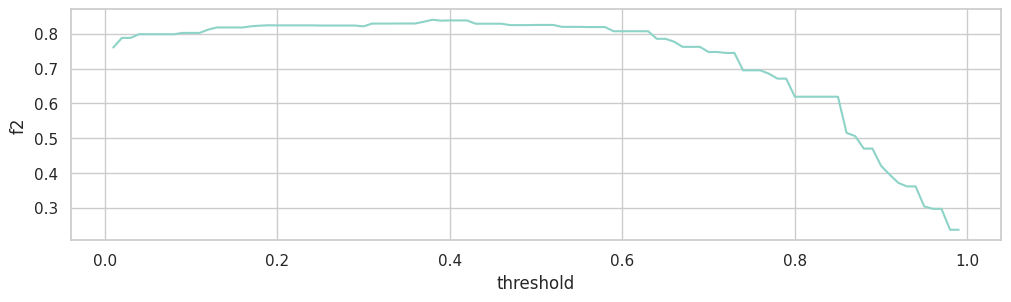

In [83]:
# Visualization
plt.figure(figsize=(12,3))
sns.lineplot(data=df_th_grid, x='threshold', y='f2')

In [84]:
# Best threshold
best_threshold = df_th_grid.sort_values(['f2','threshold'], ascending=[False, True]).head(3).iloc[0,0]
best_threshold

np.float64(0.38)

In [85]:
# Modeling by using Best Threshold # Grid search

# pipeline
pipe_model = pipe_model = gridsearch.best_estimator_

# fit
pipe_model.fit(X_train, y_train)

# predict
y_pred_proba = pipe_model.predict_proba(X_test)[:, 1]            # The prediction result in the form of probability
y_pred_optimized = np.where(y_pred_proba > best_threshold, 1, 0)     # If probability higher than 0.38 --> class 1

# f2
fbeta_score(y_test, y_pred_optimized, beta=2)

0.8402366863905325

#### **Classification report**

In [86]:
# Classification report
print(classification_report(y_test, y_pred_gridsearch))

              precision    recall  f1-score   support

         0.0       0.93      0.81      0.87      1373
         1.0       0.67      0.87      0.76       627

    accuracy                           0.83      2000
   macro avg       0.80      0.84      0.81      2000
weighted avg       0.85      0.83      0.83      2000



In [87]:
# predict probabilities
y_pred_proba = model.predict_proba(X_test)

# keep probabilities for the positive outcome only
y_pred_proba = y_pred_proba[:, 1]

# calculate pr-curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

#### **PR Curve**

In [88]:
df_pr_curve = pd.DataFrame({
    'precision': precision,
    'recall': recall,
    'thresholds': list(thresholds) + [0]
}).sort_values('precision', ascending=False)

df_pr_curve.head()

,precision,recall,thresholds
58,1.000000,0.000000,0.000000
55,0.917241,0.212121,0.979592
54,0.913793,0.253589,0.971429
56,0.912409,0.199362,0.995475
53,0.910615,0.259968,0.954545


Text(0.5, 1.0, 'Precision Recall Curve')

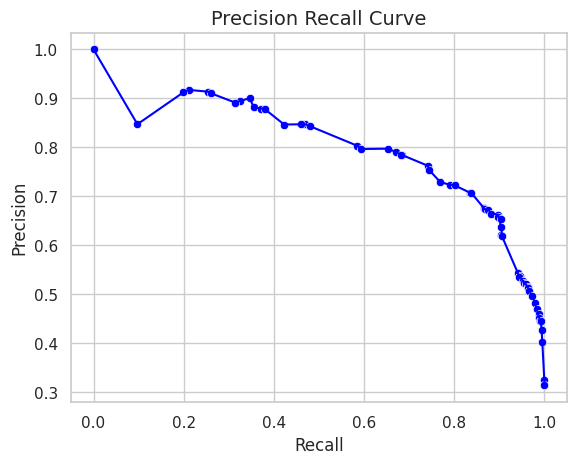

In [89]:
# How to make a precision recall curve manualy

sns.lineplot(data=df_pr_curve, x='recall', y='precision', color='b')
sns.scatterplot(data=df_pr_curve, x='recall', y='precision', color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve', size=14)

#### **Confusion matrix**

In [90]:
confusion_matrix(y_test, y_pred_gridsearch)

array([[1109,  264],
       [  79,  548]])

<Axes: >

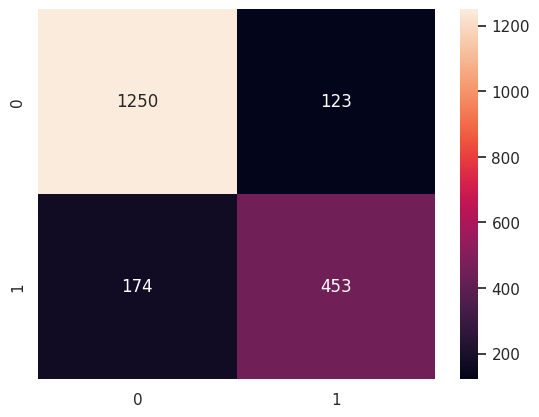

In [91]:
# Model before tuning
sns.heatmap(confusion_matrix(y_test, y_pred_benchmark), annot=True, fmt='g')

<Axes: >

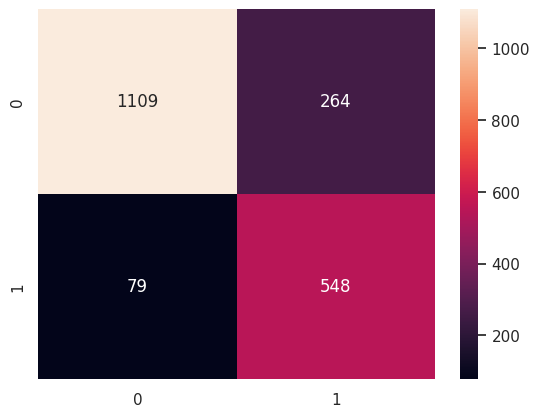

In [92]:
# Model after tuning # Gridsearch
sns.heatmap(confusion_matrix(y_test,  y_pred_gridsearch), annot=True, fmt='g')

**Result of confusion matrix from Grid Search**

* **TP (True Positive)**: 548 (predicted to file a claim, and actually did file a claim)

* **TN (True Negative)**: 1109 (predicted not to file a claim, and actually did not file a claim)

* **FP (False Positive)**: 264 (predicted to file a claim, but actually did not file a claim)

* **FN (False Negative)**: 79 (predicted not to file a claim, but actually filed a claim)

### **b. Optimized Threshold - RandomizedSearch**

In [63]:
# Optimized Threshold # Randomized Search

# pipeline
pipe_model = random_search.best_estimator_

# fit
pipe_model.fit(X_train, y_train)

# ==================================================================================
list_threshold = np.arange(0.01, 1.00, 0.01)
list_f2 = []

for threshold in list_threshold:

    # predict
    y_pred_proba = pipe_model.predict_proba(X_test)[:, 1]       # Result in form of probability
    y_pred_class = np.where(y_pred_proba > threshold, 1, 0)     # Probabilty higher than threshold --> class 1
    # f2 score
    list_f2.append(fbeta_score(y_test, y_pred_class, beta=2))

In [64]:
# Threshold vs f2 score
df_th = pd.DataFrame()
df_th['threshold'] = list_threshold
df_th['f2'] = list_f2

df_th.head()

,threshold,f2
0,0.01,0.768662
1,0.02,0.785624
2,0.03,0.785624
3,0.04,0.796211
4,0.05,0.796211


In [65]:
# Threshold vs f2 score (sorted by values)
df_th.sort_values(['f2','threshold'], ascending=[False, True]).head(3)

,threshold,f2
37,0.38,0.839751
39,0.40,0.837306
40,0.41,0.837306


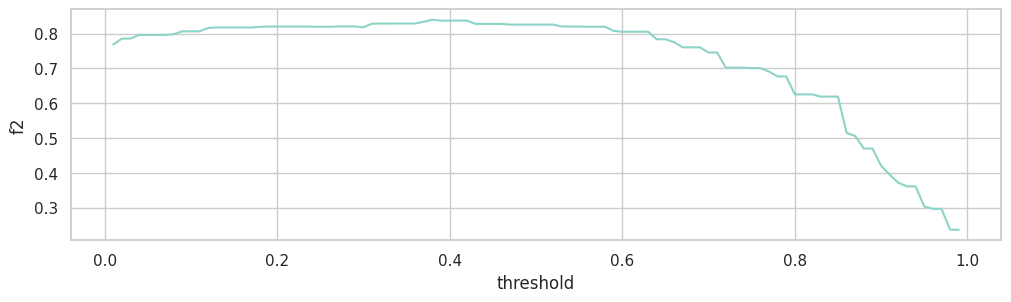

In [66]:
# Visualization
plt.figure(figsize=(12,3))
sns.lineplot(data=df_th, x='threshold', y='f2')

In [67]:
# Best threshold
best_threshold = df_th.sort_values(['f2','threshold'], ascending=[False, True]).head(3).iloc[0,0]
best_threshold

np.float64(0.38)

In [68]:
# Modeling by using Best Threshold

# pipeline
pipe_model = pipe_model = random_search.best_estimator_

# fit
pipe_model.fit(X_train, y_train)

# predict
y_pred_proba = pipe_model.predict_proba(X_test)[:, 1]            # The prediction result in the form of probability
y_pred_optimized = np.where(y_pred_proba > best_threshold, 1, 0)     # If probability higher than 0.24 --> class 1

# f2
fbeta_score(y_test, y_pred_optimized, beta=2)

0.8397511848341233

#### **Classification Report**

In [69]:
# Classification report
print(classification_report(y_test, y_pred_randomizedsearch))

              precision    recall  f1-score   support

         0.0       0.93      0.81      0.87      1373
         1.0       0.67      0.88      0.76       627

    accuracy                           0.83      2000
   macro avg       0.80      0.84      0.81      2000
weighted avg       0.85      0.83      0.83      2000



In [70]:
# model.predict_proba(X_test)

In [71]:
# predict probabilities
y_pred_proba = model.predict_proba(X_test)

# keep probabilities for the positive outcome only
y_pred_proba = y_pred_proba[:, 1]

# calculate pr-curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

#### **PR Curve**

In [72]:
df_pr_curve = pd.DataFrame({
    'precision': precision,
    'recall': recall,
    'thresholds': list(thresholds) + [0]
}).sort_values('precision', ascending=False)

df_pr_curve.head()

,precision,recall,thresholds
58,1.000000,0.000000,0.000000
55,0.917241,0.212121,0.979592
54,0.913793,0.253589,0.971429
56,0.912409,0.199362,0.995475
53,0.910615,0.259968,0.954545


Text(0.5, 1.0, 'Precision Recall Curve')

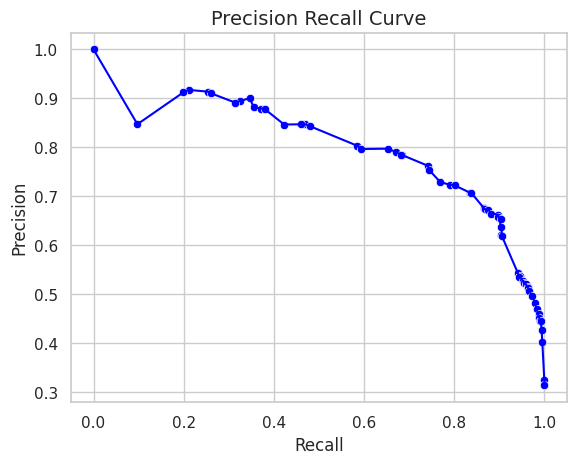

In [73]:
# How to make a precision recall curve manualy

sns.lineplot(data=df_pr_curve, x='recall', y='precision', color='b')
sns.scatterplot(data=df_pr_curve, x='recall', y='precision', color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve', size=14)

#### **Confusion Matrix**

In [74]:
confusion_matrix(y_test, y_pred_randomizedsearch)

array([[1106,  267],
       [  78,  549]])

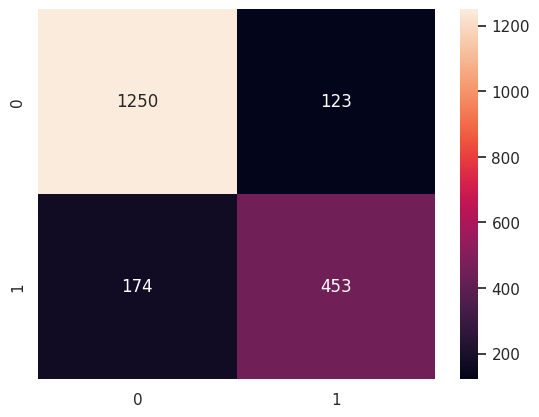

In [75]:
# Model before tuning
sns.heatmap(confusion_matrix(y_test, y_pred_benchmark), annot=True, fmt='g')

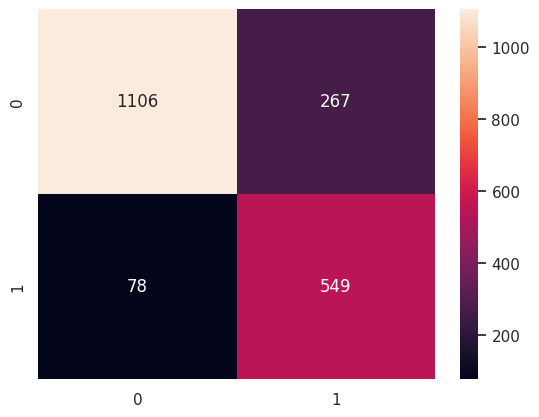

In [76]:
# Model after tuning
sns.heatmap(confusion_matrix(y_test, y_pred_randomizedsearch), annot=True, fmt='g')

**Result of confusion matrix from Randomized Search**

* **TP (True Positive)**: 549 (predicted to file a claim, and actually did file a claim)

* **TN (True Negative)**: 1106 (predicted not to file a claim, and actually did not file a claim)

* **FP (False Positive)**: 267 (predicted to file a claim, but actually did not file a claim)

* **FN (False Negative)**: 78 (predicted not to file a claim, but actually filed a claim)




## **Conclusion**

* In this project, the goal was to build a machine learning model to predict whether a customer will make a car insurance claim. Our business priority was to minimize False Negatives (FN), meaning we must prioritize recall without sacrificing too much precision. To reflect this, we used the F2 Score as our main evaluation metric.


### **Summary of Model Progress**
| Step                     | Training F2 Score | Testing F2 Score | Notes                                    |
|:-------------------------|:------------------|:-----------------|:----------------------------------------|
| Benchmark Decision Tree   | 0.8036             | 0.7531            | Before tuning                          |
| After GridSearchCV        | 0.8084             | 0.7616            | After  tuning (grid search)      |
| After RandomizedSearchCV  | 0.8091             | 0.7609            | After tuning (random search)    |

* From the table, we can see that both hyperparameter tuning methods (Grid Search and Randomized Search) slightly improved the model's performance compared to the benchmark model Decision Tree.

### **Final Model Comparison (After threshold adjustment)**
| Model                | F2 Score | Recall (Class 1) | Precision (Class 1) | False Negatives (FN) | Notes                                         |
|:----------------------|:---------|:-----------------|:--------------------|:---------------------|:----------------------------------------------|
| Grid Search           | 0.8402   | 0.8740            | 0.6743               | 79                  | Slightly higher recall, fewer FN             |
| Randomized Search     | 0.8398   | 0.8752            | 0.6739               | 78                  | Very close, recall slightly higher           |

### **Recommendation**
* Although both Grid Search and Randomized Search gave very close results, Randomized Search achieved slightly better recall and fewer false negatives (78 vs 79).

* Since our business goal emphasizes minimizing False Negatives and maximizing recall, we recommend using the **Randomized Search tuned Decision Tree model (After threshold adjustment)** as the final model for final model.